About this dataset
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

slp:slope of peak exercise ST segment, 0:downsloping 1:flat 2:upsloping

oldpeak:ST depression induced by exercise relative to rest

thall:thallassemia, 0:null,1:normal,2:fixed defect,3:reversible defect

target : 0= less chance of heart attack 1= more chance of heart attack



In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics  import accuracy_score,classification_report,roc_auc_score,plot_roc_curve,plot_precision_recall_curve
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import create_report
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'C:\Users\91708\kaggle\heart attack analysis\heart.csv')

In [3]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
data.isnull().sum()#no missing value

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [24]:
data.rename(columns={'cp':'chest_pain_type','trtbps':'resting_blood_pressure','chol':'cholestoral',
                     'fbs':'fasting_blood_sugar ','restecg':'resting_electrocardiographic_results',
'thalachh':' maximum_heart_rate_achieved','exng':' exercise_induced_angina','oldpeak':'ST.depression(exercise/rest)','slp':'slope_of_peak_exercise',
 'caa':'no_of_major_vessels','thall':'thalassemia' },inplace=True)

In [25]:
data

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,ST.depression(exercise/rest),slope_of_peak_exercise,no_of_major_vessels,thalassemia,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [92]:
numeric_var=['age','resting_blood_pressure', 'cholestoral',' maximum_heart_rate_achieved',
             'ST.depression(exercise/rest)']
categorical_var=['sex', 'chest_pain_type','fasting_blood_sugar ',
       'resting_electrocardiographic_results', ' exercise_induced_angina','slope_of_peak_exercise', 'no_of_major_vessels', 'thalassemia'
]

In [7]:
#univariate and bivariate analysis

<AxesSubplot:xlabel='output', ylabel='count'>

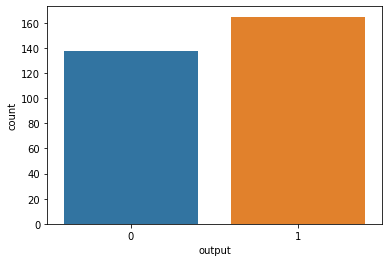

In [27]:
sns.countplot(data=data,x='output')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'resting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholestoral'}>,
        <AxesSubplot:title={'center':' maximum_heart_rate_achieved'}>],
       [<AxesSubplot:title={'center':'ST.depression(exercise/rest)'}>,
        <AxesSubplot:>]], dtype=object)

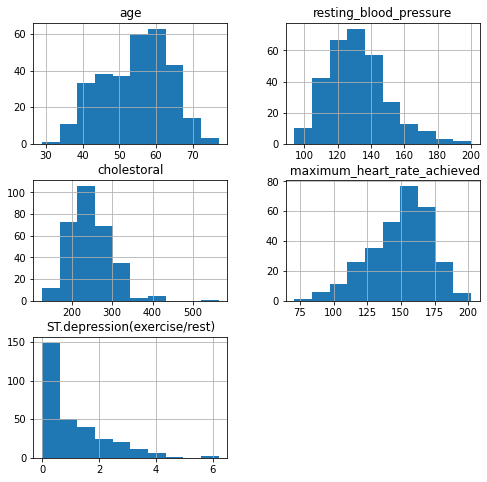

In [28]:
data[numeric_var].hist(figsize=(8,8))

<AxesSubplot:xlabel='age', ylabel='Count'>

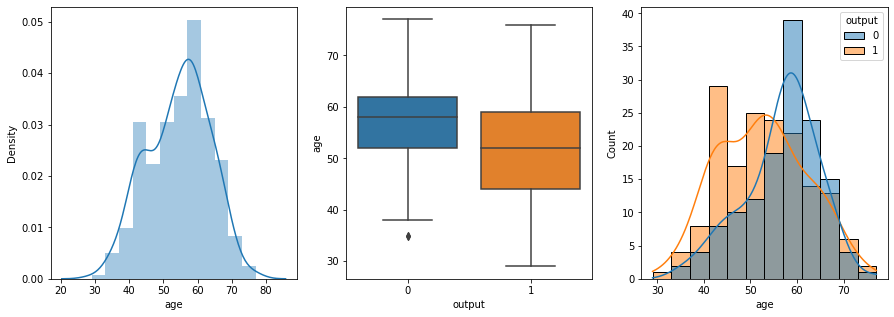

In [29]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.distplot(data['age'],ax=ax[0])
sns.boxplot(data=data,x='output',y='age',ax=ax[1])
sns.histplot(data=data,x='age',hue='output',kde=True)

In [30]:
age_noheart=data.groupby(by='output').get_group(0)[['age']]
age_heart=data.groupby(by='output').get_group(1)[['age']]
print(age_heart.mean())
print(age_noheart.mean())

age    52.49697
dtype: float64
age    56.601449
dtype: float64


In [31]:
print(data[['age']].describe().T)
print(age_heart.describe().T)
print(age_noheart.describe().T)

     count       mean       std   min   25%   50%   75%   max
age  303.0  54.366337  9.082101  29.0  47.5  55.0  61.0  77.0
     count      mean       std   min   25%   50%   75%   max
age  165.0  52.49697  9.550651  29.0  44.0  52.0  59.0  76.0
     count       mean       std   min   25%   50%   75%   max
age  138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0


In [34]:
p=stats.ttest_ind(age_heart,age_noheart,)
print(p)

Ttest_indResult(statistic=array([-4.01456098]), pvalue=array([7.5248013e-05]))


<AxesSubplot:xlabel='resting_blood_pressure', ylabel='Count'>

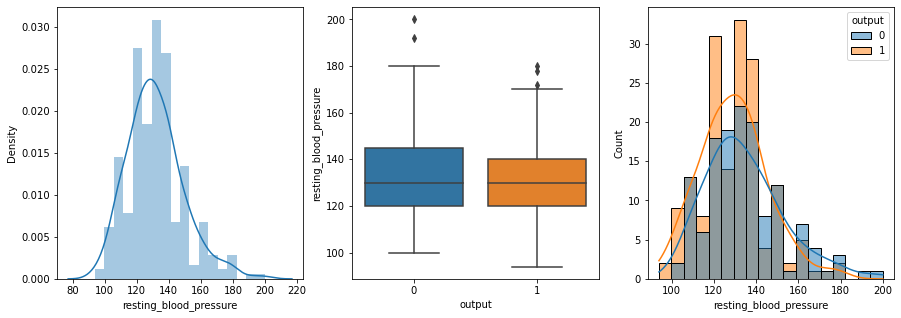

In [35]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.distplot(data['resting_blood_pressure'],ax=ax[0])
sns.boxplot(data=data,x='output',y='resting_blood_pressure',ax=ax[1])
sns.histplot(data=data,x='resting_blood_pressure',hue='output',kde=True)

In [36]:
rbp_noheart=data.groupby(by='output').get_group(0)[['resting_blood_pressure']]
rbp_heart=data.groupby(by='output').get_group(1)[['resting_blood_pressure']]
print(rbp_heart.mean())
print(rbp_noheart.mean())

resting_blood_pressure    129.30303
dtype: float64
resting_blood_pressure    134.398551
dtype: float64


In [37]:
print(stats.ttest_1samp(rbp_heart,popmean=120))
print(stats.ttest_1samp(rbp_noheart,popmean=120))

Ttest_1sampResult(statistic=array([7.39038009]), pvalue=array([7.0875415e-12]))
Ttest_1sampResult(statistic=array([9.03070896]), pvalue=array([1.40400133e-15]))


In [38]:
p=stats.ttest_ind(rbp_heart,rbp_noheart)
print(p)

Ttest_indResult(statistic=array([-2.54129272]), pvalue=array([0.01154606]))


<AxesSubplot:xlabel='cholestoral', ylabel='Count'>

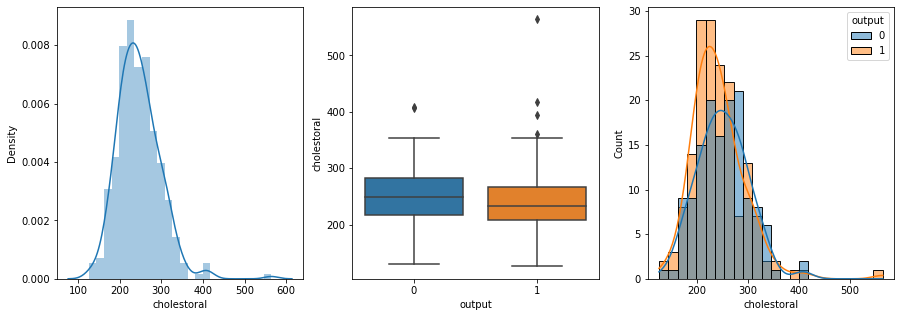

In [39]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.distplot(data['cholestoral'],ax=ax[0])
sns.boxplot(data=data,x='output',y='cholestoral',ax=ax[1])
sns.histplot(data=data,x='cholestoral',hue='output',kde=True)

In [40]:
chol_noheart=data.groupby(by='output').get_group(0)[['cholestoral']]
chol_heart=data.groupby(by='output').get_group(1)[['cholestoral']]
print(chol_heart.mean())
print(chol_noheart.mean())

cholestoral    242.230303
dtype: float64
cholestoral    251.086957
dtype: float64


In [41]:
print(data[['cholestoral']].describe().T)
print(chol_heart.describe().T)
print(chol_noheart.describe().T)

             count        mean        std    min    25%    50%    75%    max
cholestoral  303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
             count        mean        std    min    25%    50%    75%    max
cholestoral  165.0  242.230303  53.552872  126.0  208.0  234.0  267.0  564.0
             count        mean        std    min     25%    50%    75%    max
cholestoral  138.0  251.086957  49.454614  131.0  217.25  249.0  283.0  409.0


In [42]:
p=stats.ttest_ind(chol_heart,chol_noheart)
print(p)

Ttest_indResult(statistic=array([-1.48424508]), pvalue=array([0.13879033]))


<AxesSubplot:xlabel=' maximum_heart_rate_achieved', ylabel='Count'>

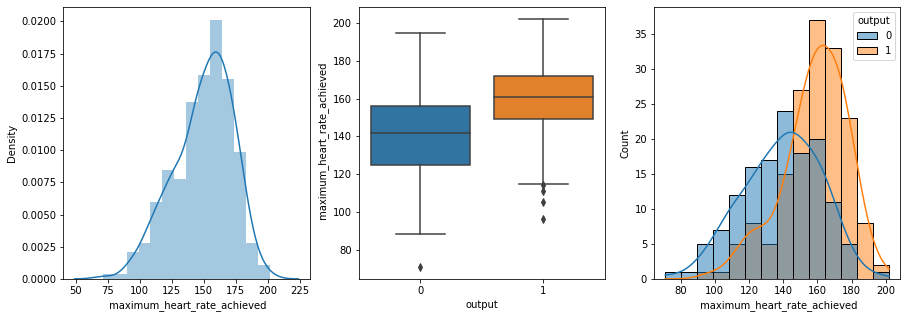

In [43]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.distplot(data[' maximum_heart_rate_achieved'],ax=ax[0])
sns.boxplot(data=data,x='output',y=' maximum_heart_rate_achieved',ax=ax[1])
sns.histplot(data=data,x=' maximum_heart_rate_achieved',hue='output',kde=True)

In [44]:
hr_noheart=data.groupby(by='output').get_group(0)[[' maximum_heart_rate_achieved']]
hr_heart=data.groupby(by='output').get_group(1)[[' maximum_heart_rate_achieved']]
print(hr_heart.mean())
print(hr_noheart.mean())

 maximum_heart_rate_achieved    158.466667
dtype: float64
 maximum_heart_rate_achieved    139.101449
dtype: float64


In [45]:
p=stats.ttest_ind(hr_heart,hr_noheart)
p

Ttest_indResult(statistic=array([8.06970287]), pvalue=array([1.69733764e-14]))

<AxesSubplot:xlabel='ST.depression(exercise/rest)', ylabel='Count'>

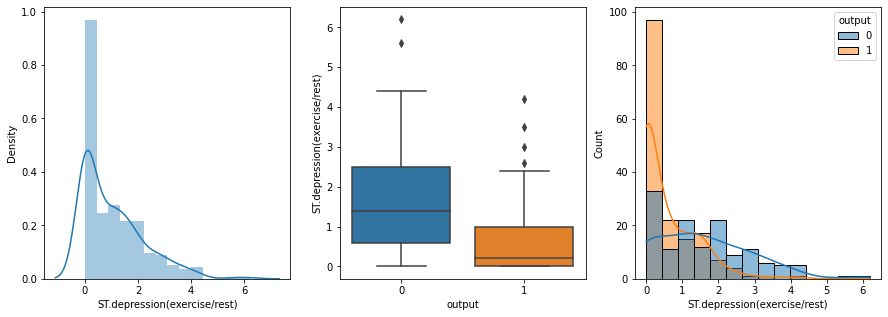

In [46]:
f,ax=plt.subplots(ncols=3,figsize=(15,5))
sns.distplot(data['ST.depression(exercise/rest)'],ax=ax[0])
sns.boxplot(data=data,x='output',y='ST.depression(exercise/rest)',ax=ax[1])
sns.histplot(data=data,x='ST.depression(exercise/rest)',hue='output',kde=True)

In [47]:
dp_noheart=data.groupby(by='output').get_group(0)[['ST.depression(exercise/rest)']]
dp_heart=data.groupby(by='output').get_group(1)[['ST.depression(exercise/rest)']]
print(dp_heart.mean())
print(dp_noheart.mean())

ST.depression(exercise/rest)    0.58303
dtype: float64
ST.depression(exercise/rest)    1.585507
dtype: float64


In [48]:
p=stats.ttest_ind(dp_heart,dp_noheart)
p

Ttest_indResult(statistic=array([-8.27957966]), pvalue=array([4.08534639e-15]))

Bivariate Analysis

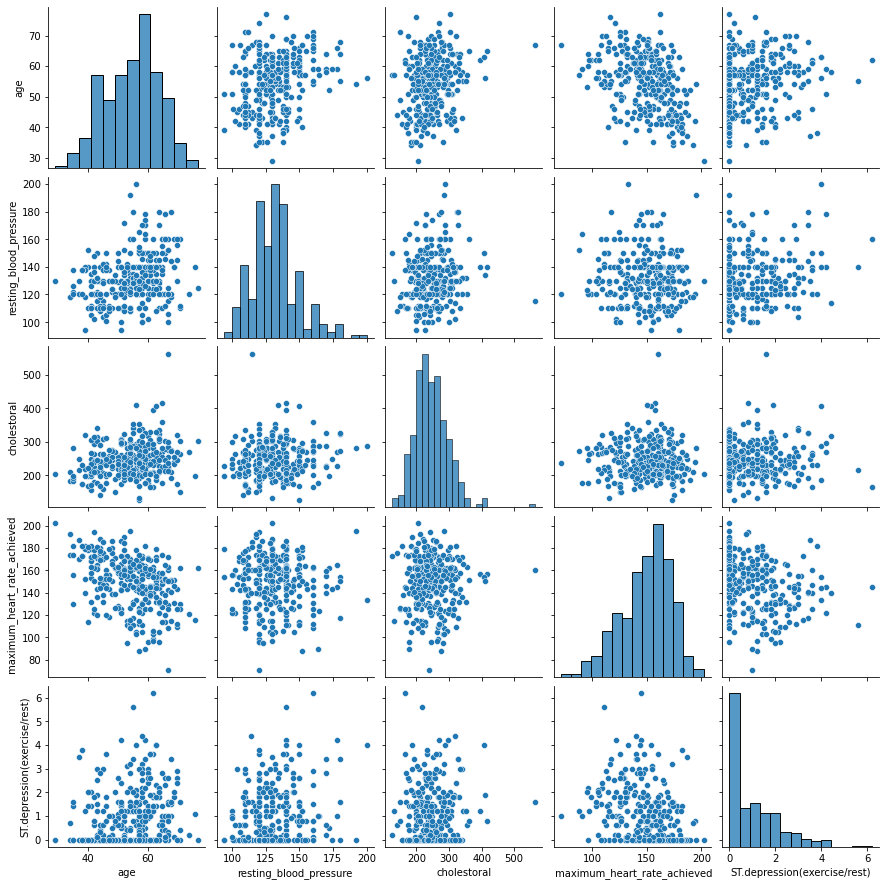

In [49]:
sns.pairplot(data[numeric_var])

In [50]:
data_table=pd.crosstab(data['output'],data['sex'])
print(data_table)

sex      0    1
output         
0       24  114
1       72   93


In [51]:
value=stats.chi2_contingency(data_table)
print(value)

(22.71722704657635, 1.8767776216941532e-06, 1, array([[ 43.72277228,  94.27722772],
       [ 52.27722772, 112.72277228]]))


<AxesSubplot:xlabel='sex', ylabel='count'>

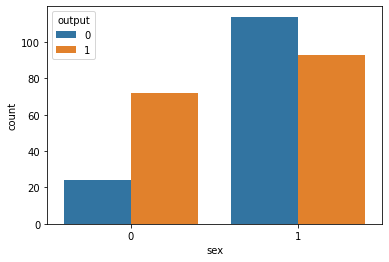

In [52]:
sns.countplot(data=data,x='sex',hue='output')

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

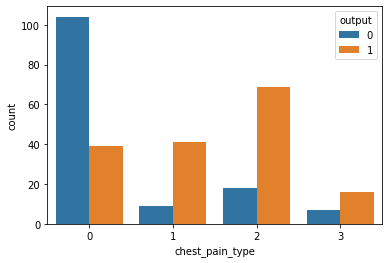

In [53]:
sns.countplot(data=data,x= 'chest_pain_type',hue='output')

In [54]:
table=pd.crosstab(data['output'],data['chest_pain_type'])
table

chest_pain_type,0,1,2,3
output,,,,
0,104,9,18,7
1,39,41,69,16


In [55]:
value=stats.chi2_contingency(table)
print(value)

(81.68642755194445, 1.3343043373050064e-17, 3, array([[65.12871287, 22.77227723, 39.62376238, 10.47524752],
       [77.87128713, 27.22772277, 47.37623762, 12.52475248]]))


<AxesSubplot:xlabel='no_of_major_vessels', ylabel='count'>

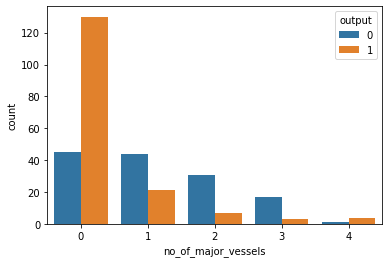

In [56]:
sns.countplot(data=data,x='no_of_major_vessels',hue='output')

In [60]:
table=pd.crosstab(data['output'],data['no_of_major_vessels'])
print(table)

no_of_major_vessels    0   1   2   3  4
output                                 
0                     45  44  31  17  1
1                    130  21   7   3  4


In [61]:
stats.chi2_contingency(table)[1]

2.7124702119593116e-15

In [62]:
val=[]
var=[]
for i,j in enumerate(categorical_var):
    table=pd.crosstab(data['output'],data[j])
    val.append(stats.chi2_contingency(table)[1])
    var.append(j)

In [63]:
for i in range(len(val)):
    print(var[i],  val[i])

sex 1.8767776216941532e-06
chest_pain_type 1.3343043373050064e-17
fasting_blood_sugar  0.7444281114149577
resting_electrocardiographic_results 0.006660598773498031
 exercise_induced_angina 7.454409331235655e-14
slope_of_peak_exercise 4.8306819342768186e-11
no_of_major_vessels 2.7124702119593116e-15
thalassemia 2.233350721012921e-18
output 5.4915095767950214e-67


<AxesSubplot:>

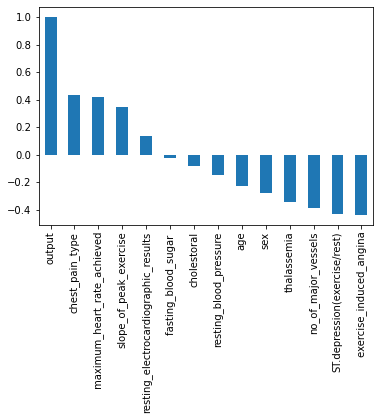

In [65]:
corr=data.corr()['output'].sort_values(ascending=False)
corr.plot(kind='bar')

In [118]:
sc=StandardScaler()
scaled_cont=sc.fit_transform(data[numeric_var])
scaled_cont=pd.DataFrame(scaled_cont,columns=numeric_var)
scaled_data=pd.concat([scaled_cont,data[categorical_var]],axis=1)

In [119]:
X=scaled_data
Y=data[['output']]

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [121]:
logreg=Pipeline([('logistic',LogisticRegression())])
decision=Pipeline([('dt',DecisionTreeClassifier())])
randomforest=Pipeline([('rf',RandomForestClassifier())])
naivebayes=Pipeline([('nb',GaussianNB())])
knn=Pipeline([('knn',KNeighborsClassifier())])
gbc=Pipeline([('gbc',GradientBoostingClassifier())])
adaboost=Pipeline([('adaboost',AdaBoostClassifier())])
sgdclassifier=Pipeline([('SGDclassifier',SGDClassifier())])
svc=Pipeline([('svc',SVC())])
mlpclass=Pipeline([('mlpc',MLPClassifier())])

In [97]:
mypipeline1=[logreg,decision,randomforest,naivebayes,knn,gbc,adaboost,sgdclassifier,svc,mlpclass]
            

In [122]:
accuracy=0.0
classifier=0
pipeline=""
pipelinedict1={0:'logistic',1:'dt',2:'rf',3:'nb',4:'knn',5:'gbc',6:'adaboost',7:'SGDclassifier',
              8:'svc',9:'mlpc'}

In [123]:
for i in mypipeline1:
    i.fit(x_train,y_train)
model_score=[]
model_name=[]
for i,j in enumerate(mypipeline1):
    print("{} test accuracy: {}".format(pipelinedict1[i],j.score(x_test,y_test)))
    model_name.append(pipelinedict1[i])
    model_score.append(j.score(x_test,y_test))

logistic test accuracy: 0.8131868131868132
dt test accuracy: 0.7142857142857143
rf test accuracy: 0.8241758241758241
nb test accuracy: 0.8021978021978022
knn test accuracy: 0.8351648351648352
gbc test accuracy: 0.8241758241758241
adaboost test accuracy: 0.7582417582417582
SGDclassifier test accuracy: 0.7912087912087912
svc test accuracy: 0.8021978021978022
mlpc test accuracy: 0.8131868131868132


<BarContainer object of 10 artists>

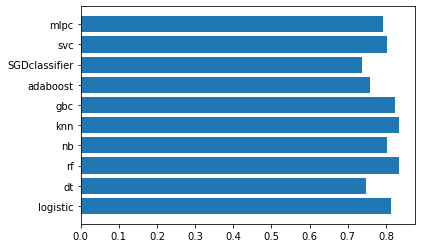

In [100]:
plt.barh(model_name,model_score)


In [101]:
knn=KNeighborsClassifier()

In [102]:
test_score=[]
train_score=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_score.append(knn.score(x_train,y_train))
    test_score.append(knn.score(x_test,y_test))

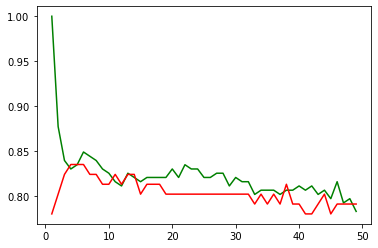

In [103]:
plt.plot(range(1,50),train_score,color='green')
plt.plot(range(1,50),test_score,color='red')
plt.show()

In [104]:
knn1=KNeighborsClassifier(n_neighbors=6)

In [105]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [106]:
knn1.score(x_test,y_test)

0.8351648351648352

In [107]:
knn2=KNeighborsClassifier(n_neighbors=6)
rand_state=[]
accuracy=[]
for i in range(1,150,1):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=i)
    knn2.fit(x_train,y_train)
    accuracy.append(knn2.score(x_test,y_test))
    rand_state.append(i)
    

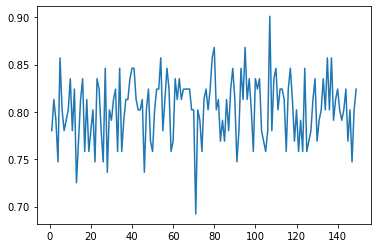

In [108]:
plt.plot(rand_state,accuracy)

In [109]:
for i in range(len(rand_state)):
    print(accuracy[i],rand_state[i])

0.7802197802197802 1
0.8131868131868132 2
0.7912087912087912 3
0.7472527472527473 4
0.8571428571428571 5
0.8021978021978022 6
0.7802197802197802 7
0.7912087912087912 8
0.8021978021978022 9
0.8351648351648352 10
0.7802197802197802 11
0.8241758241758241 12
0.7252747252747253 13
0.7692307692307693 14
0.8131868131868132 15
0.8351648351648352 16
0.7582417582417582 17
0.8131868131868132 18
0.7582417582417582 19
0.7802197802197802 20
0.8021978021978022 21
0.7472527472527473 22
0.8351648351648352 23
0.8241758241758241 24
0.7802197802197802 25
0.7472527472527473 26
0.8461538461538461 27
0.7362637362637363 28
0.8021978021978022 29
0.7912087912087912 30
0.8131868131868132 31
0.8241758241758241 32
0.7582417582417582 33
0.8461538461538461 34
0.7582417582417582 35
0.7912087912087912 36
0.8131868131868132 37
0.8131868131868132 38
0.8351648351648352 39
0.8461538461538461 40
0.8461538461538461 41
0.8131868131868132 42
0.8021978021978022 43
0.8021978021978022 44
0.8131868131868132 45
0.7362637362637363 

In [110]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=107)
knn2.fit(x_train,y_train)   

KNeighborsClassifier(n_neighbors=6)

In [111]:
knn2.score(x_test,y_test)

0.9010989010989011

In [112]:
y_test_pred=knn2.predict(x_test)


In [113]:
accuracy_score(y_test,y_test_pred)

0.9010989010989011

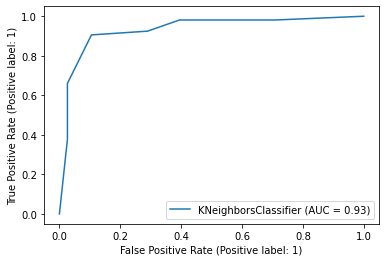

In [114]:
plot_roc_curve(knn2,x_test,y_test)

In [115]:
roc_auc_score(y_test,y_test_pred)

0.9001986097318768

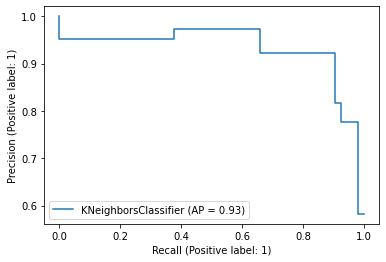

In [116]:
plot_precision_recall_curve(knn2,x_test,y_test)

In [117]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        38
           1       0.92      0.91      0.91        53

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91

